# Analysis of Sorting Algorithms
Submitted towards Data Structures and Algorithms course assignment

## Team
- Krisha Vardhni M CB.EN.U4CSE20633
- Deebakkarthi C R CB.EN.U4CSE20613
- Devaraja G CB.EN.U4CSE20614

## Algorithms
- Bubble Sort
- Insertion Sort
- Selection Sort
- Merge Sort
- Quick Sort

In [34]:
import random
import time
import tracemalloc
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def genShuffledArrays(n):
    suffledArrayCollection = []

    for i in range(1,n+1):
        arrayitem = list(range(1, i+1))
        random.shuffle(arrayitem)
        suffledArrayCollection.append(arrayitem)

    return suffledArrayCollection

shuffledArrayCollection = genShuffledArrays(100) # Array of shuffled arrays from size 1 - 100

In [36]:
def plotter(times_taken, mems_taken, swaps_taken, iterations_taken, comparisons_taken, complexity):
    n = np.array(range(1,len(times_taken)+1))
    times_np = np.array(times_taken)
    mems_np = np.array(mems_taken)
    swaps_np = np.array(swaps_taken)
    iterations_np = np.array(iterations_taken)
    comparisons_np = np.array(comparisons_taken)
    complexity_np = np.array(complexity)

    plt.title("Selection Sort")
    plt.xlabel("Size of Array")
    plt.ylabel("Measurements")
    plt.plot(n, times_np, color='red', label='Time taken')
    # plt.plot(n, mems_np, color='green', label='Memory usage')
    # plt.plot(n, swaps_np, color='blue', label='Number of swaps')
    # plt.plot(n, iterations_np, color='black', label='Number of iterations')
    # plt.plot(n, comparisons_np, color='yellow', label='Number of comparisons')
    # plt.plot(n, complexity_np, color='orange', label='Complexity')
    len(times_taken)
    plt.legend()
    plt.show()

In [37]:
def selectionSort(unsortedList):

    # SWAPS
    swaps = 0

    # ITERATIONS
    iterations = 0

    # COMPARISONS
    comparisons = 0

    # Starting time
    start_time = (round(time.time()*1000))

    # Starting memory tracing
    tracemalloc.start()

    # Initialize the sorted list as empty
    sortedList = []

    # Loop through the list
    for i in range(len(unsortedList)):
        # iterations+=1
        # Find the smallest value in the unsorted list
        smallest = unsortedList[0]
        for j in range(len(unsortedList)):
            iterations+=1
            if unsortedList[j] < smallest:
                smallest = unsortedList[j]
                comparisons+=1
        
        # Append the smallest value to the sorted list
        sortedList.append(smallest)

        # Remove the smallest value from the unsorted list
        unsortedList.remove(smallest)

        # Removal from unsorted list and appending to sorted list is 1 swap
        swaps+=1

    # End memory tracing
    mem_taken = list(tracemalloc.get_traced_memory())[1]
    tracemalloc.stop()

    # End time
    end_time = (round(time.time()*1000))

    # Total time
    time_taken = end_time - start_time

    return [sortedList, time_taken, mem_taken, swaps, iterations, comparisons]

In [38]:
def selectionSortWrappper():
    times_taken = []
    mems_taken = []
    swaps_taken = []
    iterations_taken = []
    comparisons_taken = []
    complexity = [] # O(n^2) for Selection sort

    for i in range(len(shuffledArrayCollection)):
        [sortedarray, time_taken, mem_taken, swaps, iterations, comparisons]= selectionSort(shuffledArrayCollection[i].copy())
        times_taken.append(time_taken)
        mems_taken.append(mem_taken)
        swaps_taken.append(swaps)
        iterations_taken.append(iterations)
        comparisons_taken.append(comparisons)
        complexity.append(i*i)

        if i==10:
            print("Unsorted array: ", shuffledArrayCollection[i])
            print("Sorted array: ", sortedarray)
            print("Time taken [in ns]: ", time_taken)
            print("Maximum memory taken: ", mem_taken)
            print("Swaps: ", swaps)
            print("Iterations: ", iterations)
            print("Comparisons: ", comparisons)
    print(times_taken[-1], mems_taken[-1], swaps_taken[-1], iterations_taken[-1], comparisons_taken[-1])
    return times_taken, mems_taken, swaps_taken, iterations_taken, comparisons_taken, complexity

Unsorted array:  [7, 1, 2, 8, 4, 3, 5, 10, 6, 9, 11]
Sorted array:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Time taken [in ns]:  0
Maximum memory taken:  304
Swaps:  11
Iterations:  66
Comparisons:  8
9 2261 100 5050 331


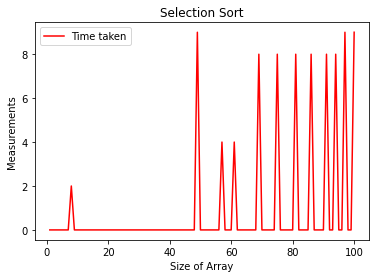

In [39]:
selectionSortResult = selectionSortWrappper()
plotter(selectionSortResult[0], selectionSortResult[1], selectionSortResult[2], selectionSortResult[3], selectionSortResult[4], selectionSortResult[5])

In [40]:
def bubbleSort(unsortedList):

    # SWAPS
    swaps = 0

    # ITERATIONS
    iterations = 0

    # COMPARISONS
    comparisons = 0

    # Starting time
    start_time = (round(time.time()*1000))

    # Starting memory tracing
    tracemalloc.start()

    # Loop through the list
    for i in range(len(unsortedList)):
        iterations+=1
        
        for j in range(len(unsortedList)-1-i):
            iterations+=1
            comparisons+=1
            if unsortedList[j] > unsortedList[j+1]:
                t=unsortedList[j]
                unsortedList[j] = unsortedList[j+1]
                unsortedList[j+1] = t
                swaps+=1
                # print(unsortedList)

    # End memory tracing
    mem_taken = list(tracemalloc.get_traced_memory())[1]
    tracemalloc.stop()

    # End time
    end_time = (round(time.time()*1000))

    # Total time
    time_taken = end_time - start_time

    sortedList=unsortedList

    return [sortedList, time_taken, mem_taken, swaps, iterations, comparisons]

In [41]:
def bubbleSortWrappper():
    times_taken = []
    mems_taken = []
    swaps_taken = []
    iterations_taken = []
    comparisons_taken = []
    complexity = [] # O(n^2) for Selection sort

    for i in range(len(shuffledArrayCollection)):
        [sortedarray, time_taken, mem_taken, swaps, iterations, comparisons]= bubbleSort(shuffledArrayCollection[i].copy())
        times_taken.append(time_taken)
        mems_taken.append(mem_taken)
        swaps_taken.append(swaps)
        iterations_taken.append(iterations)
        comparisons_taken.append(comparisons)
        complexity.append(i*i)

        if i==15:
            print("Unsorted array: ", shuffledArrayCollection[i])
            print("Sorted array: ", sortedarray)
            print("Time taken [in ns]: ", time_taken)
            print("Maximum memory taken: ", mem_taken)
            print("Swaps: ", swaps)
            print("Iterations: ", iterations)
            print("Comparisons: ", comparisons)
    print(times_taken[-1], mems_taken[-1], swaps_taken[-1], iterations_taken[-1], comparisons_taken[-1])
    return times_taken, mems_taken, swaps_taken, iterations_taken, comparisons_taken, complexity

Unsorted array:  [15, 12, 10, 9, 13, 2, 4, 6, 3, 8, 7, 14, 1, 5, 16, 11]
Sorted array:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Time taken [in ns]:  0
Maximum memory taken:  112
Swaps:  67
Iterations:  136
Comparisons:  120
8 196 2311 5050 4950


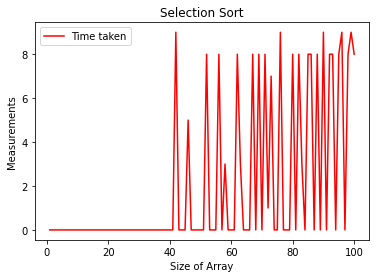

In [42]:
selectionSortResult = bubbleSortWrappper()
plotter(selectionSortResult[0], selectionSortResult[1], selectionSortResult[2], selectionSortResult[3], selectionSortResult[4], selectionSortResult[5])

In [43]:
def insertionSort(unsortedList):

    # SWAPS
    swaps = 0

    # ITERATIONS
    iterations = 0

    # COMPARISONS
    comparisons = 0

    # Starting time
    start_time = (round(time.time()*1000))

    # Starting memory tracing
    tracemalloc.start()

    # Loop through the list
    for i in range(1, len(unsortedList)):
        iterations+=1
        key = unsortedList[i]
        ptr=i-1
        comparisons+=1

        while ptr>=0 and unsortedList[ptr]>key:             
          unsortedList[ptr+1]=unsortedList[ptr]
          ptr-=1 
          swaps+=1
          iterations+=1
        
        unsortedList[ptr+1]=key

    # End memory tracing
    mem_taken = list(tracemalloc.get_traced_memory())[1]
    tracemalloc.stop()

    # End time
    end_time = (round(time.time()*1000))

    # Total time
    time_taken = end_time - start_time

    sortedList=unsortedList

    return [sortedList, time_taken, mem_taken, swaps, iterations, comparisons]

In [44]:
def insertionSortWrappper():
    times_taken = []
    mems_taken = []
    swaps_taken = []
    iterations_taken = []
    comparisons_taken = []
    complexity = [] # O(n^2) for Selection sort

    for i in range(len(shuffledArrayCollection)):
        [sortedarray, time_taken, mem_taken, swaps, iterations, comparisons]= insertionSort(shuffledArrayCollection[i].copy())
        times_taken.append(time_taken)
        mems_taken.append(mem_taken)
        swaps_taken.append(swaps)
        iterations_taken.append(iterations)
        comparisons_taken.append(comparisons)
        complexity.append(i*i)

        if i==15:
            print("Unsorted array: ", shuffledArrayCollection[i])
            print("Sorted array: ", sortedarray)
            print("Time taken [in ns]: ", time_taken)
            print("Maximum memory taken: ", mem_taken)
            print("Swaps: ", swaps)
            print("Iterations: ", iterations)
            print("Comparisons: ", comparisons)
    return times_taken, mems_taken, swaps_taken, iterations_taken, comparisons_taken, complexity

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 0, 80, 13, 23, 10]